In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import torch as pt
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Dense,Flatten
import os 
import cv2
import imghdr

In [2]:
data_dir = 'homer_bart'
os.listdir(os.path.join(data_dir,'homer'))

['homer1.bmp',
 'homer10.bmp',
 'homer100.bmp',
 'homer101.bmp',
 'homer102.bmp',
 'homer103.bmp',
 'homer104.bmp',
 'homer105.bmp',
 'homer106.bmp',
 'homer107.bmp',
 'homer109.bmp',
 'homer110.bmp',
 'homer112.bmp',
 'homer113.bmp',
 'homer115.bmp',
 'homer116.bmp',
 'homer117.bmp',
 'homer119.bmp',
 'homer120.bmp',
 'homer121.bmp',
 'homer122.bmp',
 'homer123.bmp',
 'homer124.bmp',
 'homer13.bmp',
 'homer14.bmp',
 'homer15.bmp',
 'homer16.bmp',
 'homer17.bmp',
 'homer18.bmp',
 'homer2.bmp',
 'homer20.bmp',
 'homer21.bmp',
 'homer22.bmp',
 'homer23.bmp',
 'homer24.bmp',
 'homer26.bmp',
 'homer27.bmp',
 'homer28.bmp',
 'homer29.bmp',
 'homer3.bmp',
 'homer30.bmp',
 'homer31.bmp',
 'homer32.bmp',
 'homer33.bmp',
 'homer34.bmp',
 'homer35.bmp',
 'homer36.bmp',
 'homer37.bmp',
 'homer38.bmp',
 'homer4.bmp',
 'homer40.bmp',
 'homer41.bmp',
 'homer43.bmp',
 'homer44.bmp',
 'homer45.bmp',
 'homer46.bmp',
 'homer47.bmp',
 'homer48.bmp',
 'homer49.bmp',
 'homer5.bmp',
 'homer50.bmp',
 'homer5

In [3]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        img = cv2.imread(image_path)

In [4]:
dummy = cv2.imread(os.path.join('homer_bart','homer','homer1.bmp'))
dummy.shape

(576, 237, 3)

In [5]:
size = 32
img_len,img_wid = 64,64

In [6]:
data = tf.keras.utils.image_dataset_from_directory('homer_bart',batch_size=size,image_size=(img_len,img_wid))

Found 269 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()
len(batch)

2

In [9]:
batch[1]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0])

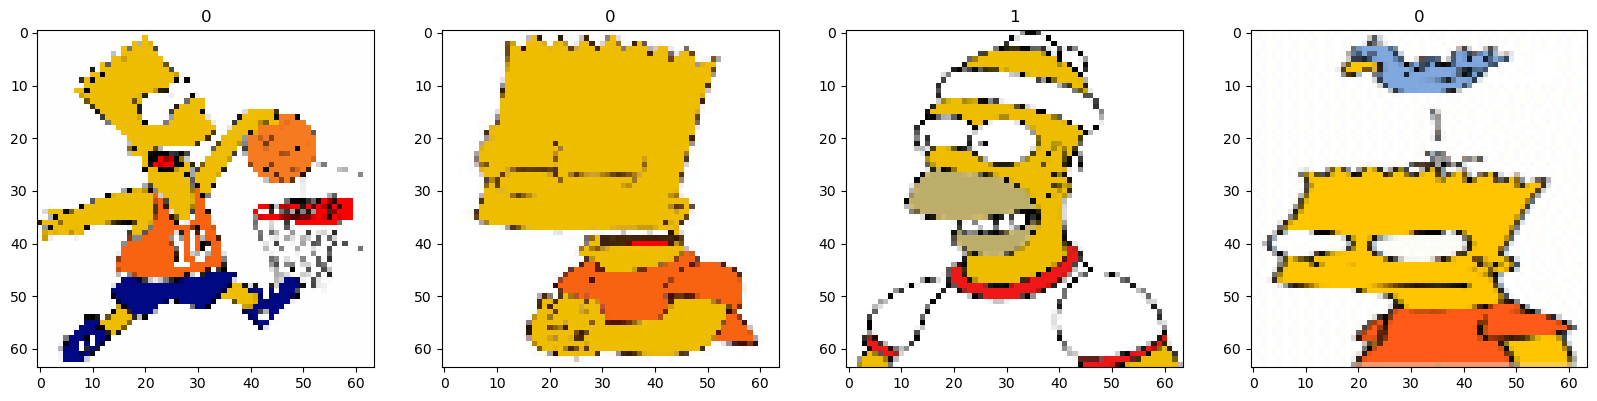

In [10]:
fig,ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
batch = data_iterator.next()

In [12]:
batch[1]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1])

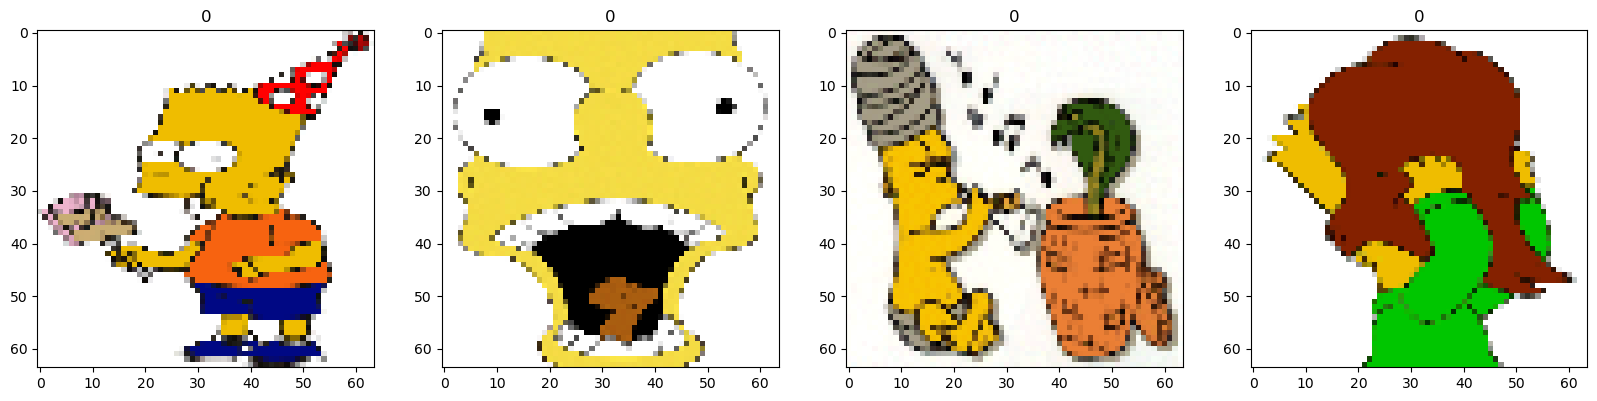

In [13]:
fig,ax = plt.subplots(ncols = 4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
#From the above it is clear that we are having the following Binary Classification:
# 1 :- Homer
# 0 :- Bart

In [15]:
#Pre Processing the data!
#Scaling the Data
print(f'Maximum batch value : {batch[0].max()} and Minimum batch value : {batch[0].min()}')
data = data.map(lambda x,y : (x/255 , y))

Maximum batch value : 255.0 and Minimum batch value : 0.0


In [16]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [17]:
#Splitting the Data into Train and Test Sets
train_size  = int(len(data)*0.9)
test_size = len(data) - train_size
print(f'{train_size} : {test_size}')

8 : 1


In [18]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [19]:
#Defining the Neural Network 
model = Sequential()
model.add(Flatten(input_shape = (img_len,img_wid,3)))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
# model.add(Dense(256,activation = 'relu'))
# model.add(Dense(128,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
    

In [20]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 256)               3145984   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3277825 (12.50 MB)
Trainable params: 3277825 (12.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
hist = model.fit(train,epochs = 30 )

Epoch 1/30
8/8 [==============================] - 2s 61ms/step - loss: 2.0837 - accuracy: 0.4961
Epoch 2/30
8/8 [==============================] - 1s 63ms/step - loss: 1.1179 - accuracy: 0.4844
Epoch 3/30
8/8 [==============================] - 1s 61ms/step - loss: 0.7459 - accuracy: 0.5977
Epoch 4/30
8/8 [==============================] - 1s 69ms/step - loss: 0.6191 - accuracy: 0.6562
Epoch 5/30
8/8 [==============================] - 1s 67ms/step - loss: 0.5141 - accuracy: 0.7383
Epoch 6/30
8/8 [==============================] - 1s 63ms/step - loss: 0.4744 - accuracy: 0.7852
Epoch 7/30
8/8 [==============================] - 1s 67ms/step - loss: 0.4494 - accuracy: 0.7891
Epoch 8/30
8/8 [==============================] - 1s 64ms/step - loss: 0.4225 - accuracy: 0.8086
Epoch 9/30
8/8 [==============================] - 1s 66ms/step - loss: 0.3955 - accuracy: 0.8438
Epoch 10/30
8/8 [==============================] - 1s 64ms/step - loss: 0.3691 - accuracy: 0.8477
Epoch 11/30
8/8 [============

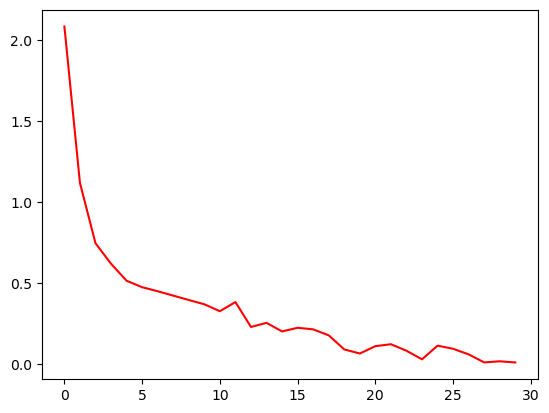

In [23]:
fig= plt.figure()
plt.plot(hist.history['loss'] , color = 'red', label = 'Loss')
plt.show()

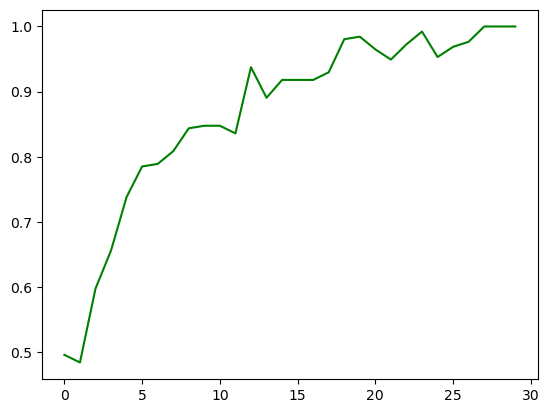

In [24]:
plt.plot(hist.history['accuracy'] , color = 'green' , label = 'Accuracy')
plt.show()

In [25]:
#Testing the model 
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy,Accuracy

In [26]:
# Assuming `model` is your trained model and `test` is your test dataset
pre = Precision()
re = Recall()
accuracy = Accuracy()
bin_acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
    X, y = batch
    y_hat = model.predict(X)
    
    # Threshold predictions to binary classes (0 or 1)
    y_hat_classes = (y_hat > 0.5).astype(int)
    
    # Update metrics with true labels and predicted classes
    pre.update_state(y, y_hat_classes)
    re.update_state(y, y_hat_classes)
    accuracy.update_state(y, y_hat_classes)
    bin_acc.update_state(y, y_hat_classes)


precision = pre.result().numpy()*100
recall = re.result().numpy()*100
accuracy = accuracy.result().numpy()*100
binary_accuracy = bin_acc.result().numpy()*100

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Binary Accuracy : {binary_accuracy}")


1/1 [==============================] - 0s 103ms/step
Precision: 100.0
Recall: 100.0
Accuracy: 100.0
Binary Accuracy : 100.0
